In [25]:
import numpy as np
import pandas as pd
from pylab import rcParams
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
temp_mean=None
temp_std=None
def loadfile():
            df= pd.read_csv('/home/neelesh/Downloads/AdmissionDataset/data.csv')
            df=df.drop(['Serial No.'],axis=1)
            X1=df.drop(['Chance of Admit '],axis=1)
            Y1=df[['Chance of Admit ']]

            X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2,random_state=1)
            X_train=X_train.reset_index(drop=True)
            Y_train=Y_train.reset_index(drop=True)
            X_test=X_test.reset_index(drop=True)
            Y_test=Y_test.reset_index(drop=True)
            df=pd.concat([X_train,Y_train], axis=1)
            temp_std=list(df.std())
            temp_mean = list(df.mean())
            df = (df - df.mean())*1.0/df.std()
            X = df.iloc[:,0:7]
            ones = np.ones([X.shape[0],1])
            X = np.concatenate((ones,X),axis=1)
            Y= df.iloc[:,7:8].values
            temp1=((X.T).dot(Y))
            temp2=np.linalg.inv((X.T).dot(X))
            theta1=temp2.dot(temp1)
            return df,X_train, X_test, Y_train, Y_test,temp_std,temp_mean,X,Y,theta1


In [26]:
def geterror(theta,X_test,Y_test,temp_std,temp_mean):
        Res_MeanSquareErrorLoss=[]
        test=[]
        Y_test1=np.array(Y_test)
        X_test1=np.array(X_test)
        for i in range(0,len(Y_test1)):
             test.append(Y_test1[i][0])
        test=np.array(test)        
        for i in range(len(X_test1)):
            Res_MeanSquareErrorLoss.append(predict_one(theta,X_test1[i],temp_std,temp_mean))
        return 1-r2_score(test,Res_MeanSquareErrorLoss)

In [27]:
def myfunc(X,theta):
    temp=0
    for i in range(0,len(theta)):
        temp+=(theta[i]*X[i])
    return temp    
def predict_one(theta,test_row,temp_std,temp_mean):
    temp=test_row
    for i in range(len(test_row)):
        test_row[i]=(test_row[i]-temp_mean[i])/(temp_std[i])
    normalised =  theta[0]*1 +theta[1]*test_row[0] +theta[2]*test_row[1] +theta[3]*test_row[2] +theta[4]*test_row[3] +theta[5]*test_row[4] +theta[6]*test_row[5] +theta[7]*test_row[6] 
    for i in range(len(test_row)):
        test_row[i]=(test_row[i]*(temp_std[i]))+temp_mean[i]
    return (normalised*temp_std[-1])+temp_mean[-1] 

In [28]:
def gradientDescent_MeanSquareErrorLoss(X,Y,theta,iterations,alpha,X_test,Y_test,temp_std,temp_mean):
    temp=[0]*8
    error=[0]*iterations
    for i in range(iterations):
        for j in range(len(theta)):
                sum1=0
                for k in range(len(X)):
                    sum1+=(myfunc(X[k],theta)-Y[k])*X[k][j]
                temp[j]=theta[j]-((float(sum1)*alpha)/len(X))
                
        for j in range(len(theta)):
              theta[j]=temp[j]        
        error[i]=geterror(theta,X_test,Y_test,temp_std,temp_mean)
    return error,theta
  
def gradientDescent_MeanAbsoluteError(X,Y,theta,iterations,alpha,X_test,Y_test,temp_std,temp_mean):
    temp=[0]*8
    error=[0]*iterations
    for i in range(iterations):
        for j in range(len(theta)):
                sum1=0
                for k in range(len(X)):
                    temp1=(myfunc(X[k],theta))
                    sum1+=((temp1-Y[k])/(abs(temp1-Y[k])))*X[k][j]
                temp[j]=theta[j]-((float(sum1)*alpha)/len(X))
                
        for j in range(len(theta)):
              theta[j]=temp[j]        
        error[i]=geterror(theta,X_test,Y_test,temp_std,temp_mean)
    return error
  
def gradientDescent_MeanAbsolutePercentageError(X,Y,theta,iterations,alpha,X_test,Y_test,temp_std,temp_mean):
    temp=[0]*8
    err=[0]*iterations
    for i in range(iterations):
        for j in range(len(theta)):
                sum1=0
                for k in range(len(X)):
                    error=((myfunc(X[k],theta))-Y[k])/float(Y[k])
                    sum1+=(error/(abs(error))*(abs(X[k][j]/float(Y[k]))))
                temp[j]=theta[j]-((float(sum1)*alpha)/len(X))
                
        for j in range(len(theta)):
              theta[j]=temp[j]        
        err[i]=geterror(theta,X_test,Y_test,temp_std,temp_mean)

    return err

In [29]:
def execute(X,Y,X_test,Y_test,temp_std,temp_mean):
        alpha = 0.01
        iterations = 100
        theta = [0]*8
        error1,theta1=gradientDescent_MeanSquareErrorLoss(X,Y,theta,iterations,alpha,X_test,Y_test,temp_std,temp_mean)
        theta = [0]*8
        error2=gradientDescent_MeanAbsoluteError(X,Y,theta,iterations,alpha,X_test,Y_test,temp_std,temp_mean)
        theta = [0]*8
        error3=gradientDescent_MeanAbsolutePercentageError(X,Y,theta,iterations,alpha,X_test,Y_test,temp_std,temp_mean)
        return error1,error2,error3,theta1

In [ ]:
def geterror1(theta,X_test,Y_test,temp_std,temp_mean):
        Res_MeanSquareErrorLoss=[]
        test=[]
        Y_test1=np.array(Y_test)
        X_test1=np.array(X_test)
        for i in range(0,len(Y_test1)):
             test.append(Y_test1[i][0])
        test=np.array(test)        
        for i in range(len(X_test1)):
            Res_MeanSquareErrorLoss.append(predict_one(theta,X_test1[i],temp_std,temp_mean))
        return Res_MeanSquareErrorLoss

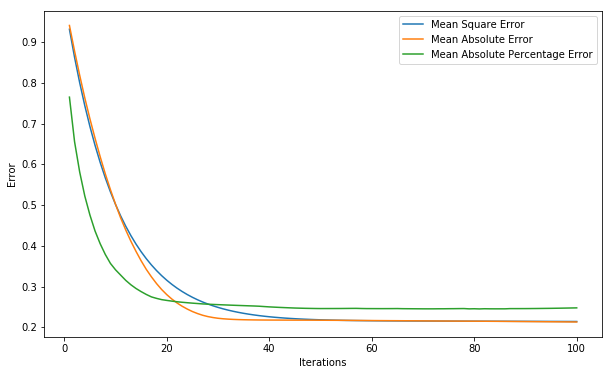

In [32]:
def myplot(num):
    df,X_train, X_test, Y_train, Y_test,temp_std,temp_mean,X,Y,theta1=loadfile()
#     if(len(sys.argv)>1):
#             Test_Filename=sys.argv[1]
#             testdf =pd.read_csv(Test_Filename)
#             testdf=testdf.drop(['Serial No.'],axis=1)
#             X_test=testdf.drop(['Chance of Admit '],axis=1)
#             Y_test=testdf[['Chance of Admit ']]
    error1,error2,error3,theta1=execute(X,Y,X_test,Y_test,temp_std,temp_mean)
 
    plt.figure(figsize=(10,6))
    nodes=[i for i in range(1,101)]
    if(num==1):
            plt.plot(nodes,error1, label = 'Mean Square Error')
    elif(num==2):
            plt.plot(nodes,error2, label = 'Mean Absolute Error')
    elif(num==3):        
        plt.plot(nodes,error3, label = 'Mean Absolute Percentage Error')
    else:
        plt.plot(nodes,error1, label = 'Mean Square Error')
        plt.plot(nodes,error2, label = 'Mean Absolute Error')
        plt.plot(nodes,error3, label = 'Mean Absolute Percentage Error')
       
    plt.legend()
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()
    error=geterror1(theta1,X_test,Y_test,temp_std,temp_mean)
    return error
Error=myplot(4)


# Residual Plots

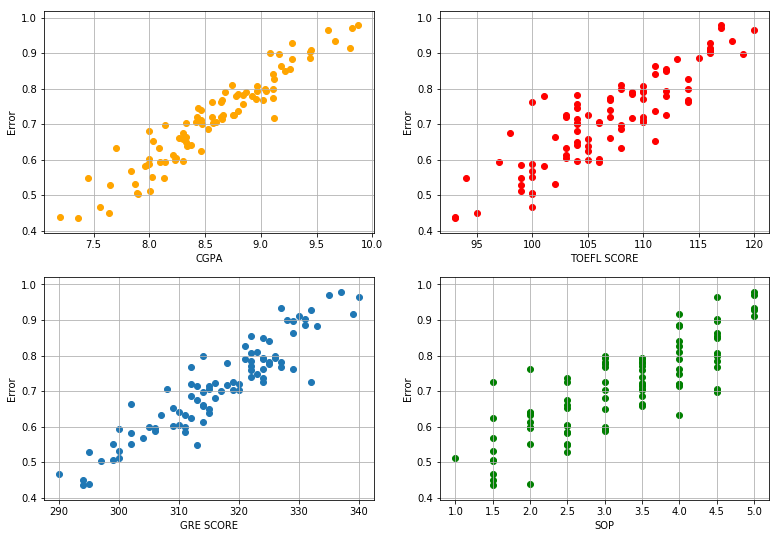

In [41]:
rcParams['figure.figsize'] = 13,9
plt.subplot(221)
GRE = X_test['CGPA'].values
plt.xlabel('CGPA')
plt.ylabel('Error')
plt.scatter(GRE,Error,label="CGPA vs Error",color='orange')
plt.grid(True)

plt.subplot(222)
GRE = X_test['TOEFL Score'].values
plt.xlabel('TOEFL SCORE')
plt.ylabel('Error')
plt.scatter(GRE,Error,label="TOEFL SCORE vs Error",color='red')
plt.grid(True)

plt.subplot(223)
GRE = X_test['GRE Score'].values
plt.xlabel('GRE SCORE')
plt.ylabel('Error')
plt.scatter(GRE,Error,label="GRE vs Error")
plt.grid(True)




plt.subplot(224)
SOP = X_test['SOP'].values
plt.xlabel('SOP')
plt.ylabel('Error')
plt.scatter(SOP,Error,label="SOP vs Error",color='green')
plt.grid(True)
plt.show()

# Observations:

Clearly from the above graphs it can be seen that Mean Square Error and Mean Absolute error gives almost same result for our testing data.

Both mean squared error (MSE) and mean absolute error (MAE) are used in predictive modeling. MSE has nice mathematical properties which makes it easier to compute the gradient. However, MAE requires more complicated tools such as linear programming to compute the gradient. Because of the square, large errors have relatively greater influence on MSE than do the smaller error. Therefore, MAE is more robust to outliers since it does not make use of square. On the other hand, MSE is more useful if we are concerned about large errors whose consequences are much bigger than equivalent smaller ones. MSE also correspons to maximizing the likelihood of Gaussian random variables.

Points in above residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data